<a href="https://colab.research.google.com/github/shruti-sharma12/IPPR-LAB/blob/main/ippr(expt_6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SHRUTI SHARMA

PRN: 1032211936

EXPERIMENT 6

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Pre-process the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape train and test samples to include one more dimension for channels
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 0s 0us/step


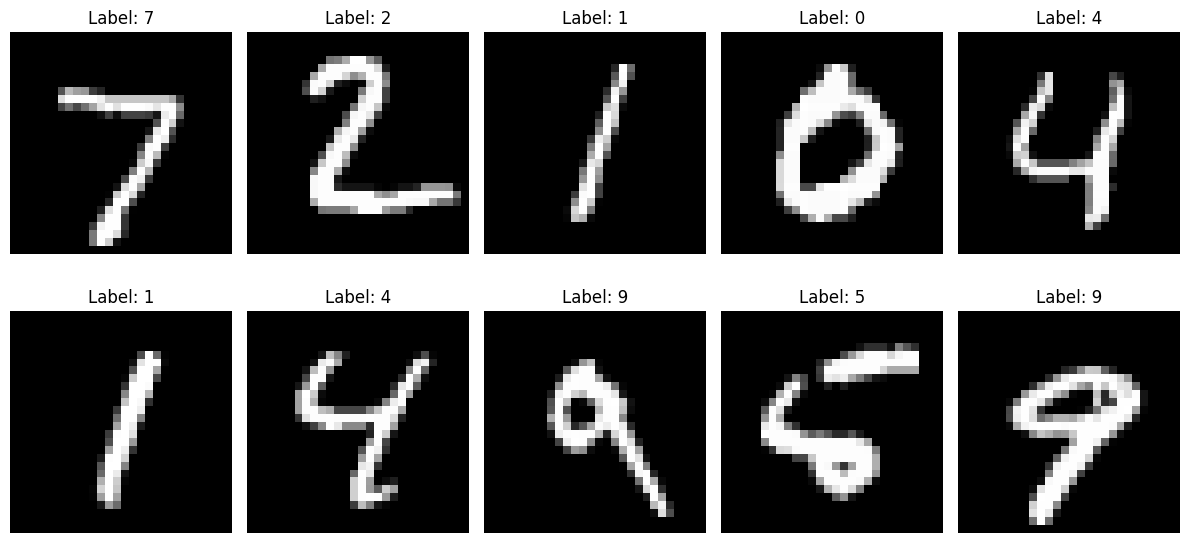

In [3]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Set the CNN model
model = Sequential()

# Add 2D convolution layer with 32 filters, each of size 4x4 and 'relu' activation function
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))

# Add MaxPool layer with size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Flatten layer
model.add(Flatten())

# Add two Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 47s 115ms/step - loss: 0.2314 - accuracy: 0.9345 - val_loss: 0.0868 - val_accuracy: 0.9761
Epoch 2/5
375/375 [==============================] - 25s 67ms/step - loss: 0.0701 - accuracy: 0.9785 - val_loss: 0.0664 - val_accuracy: 0.9818
Epoch 3/5
375/375 [==============================] - 26s 69ms/step - loss: 0.0471 - accuracy: 0.9861 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 4/5
375/375 [==============================] - 26s 68ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0494 - val_accuracy: 0.9860
Epoch 5/5
375/375 [==============================] - 27s 71ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 0.0508 - val_accuracy: 0.9850


In [5]:
saved_model = save_model(model, 'mnist_cnn_model.h5')
loaded_model = load_model('mnist_cnn_model.h5')
model.summary()

<ipython-input-5-7642a30ebf11>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saved_model = save_model(model, 'mnist_cnn_model.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [6]:
# Evaluate the trained model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0404 - accuracy: 0.9867
Test Loss: 0.04036228731274605
Test Accuracy: 0.9866999983787537


In [7]:
# Predict class of all the test samples
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 3s 8ms/step


In [8]:
# Generate classification report
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



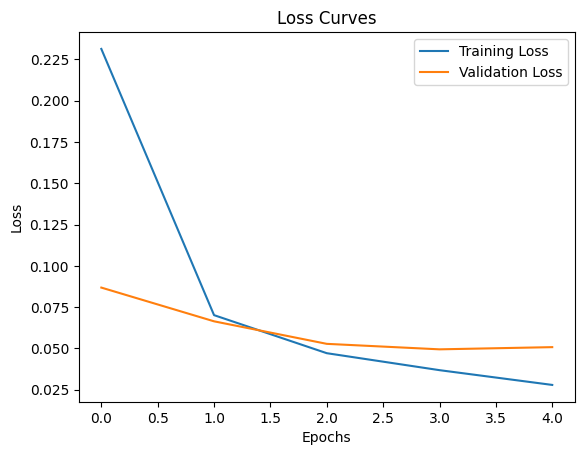

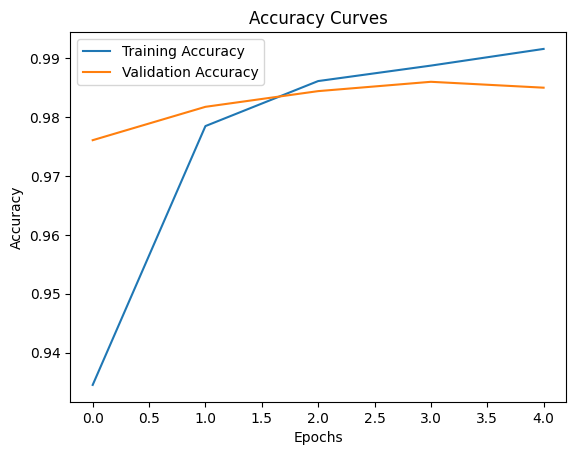

In [9]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

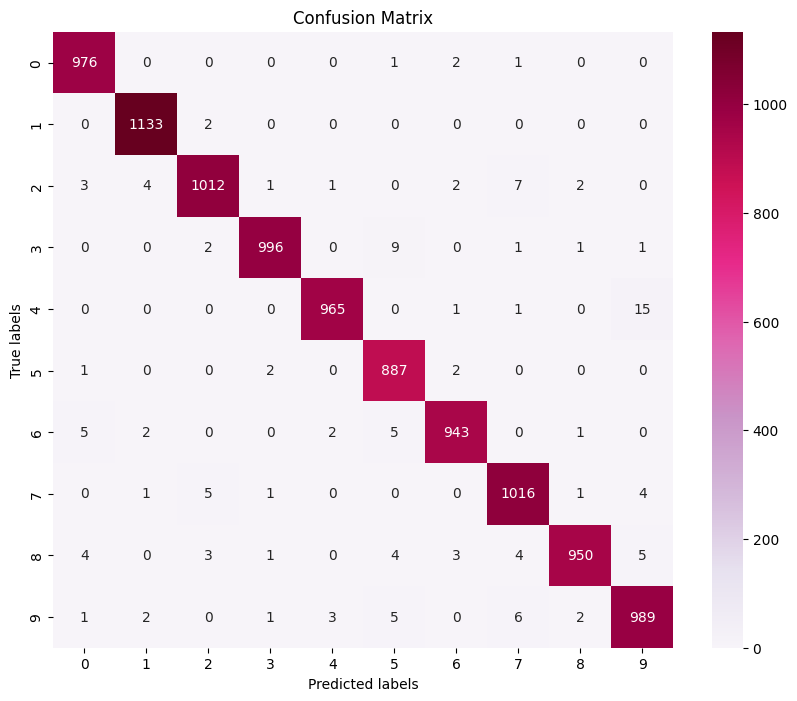

In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

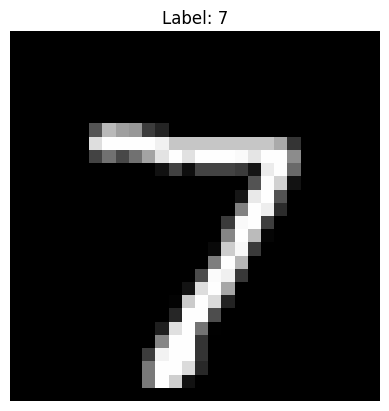

In [11]:
# Plotting the sample image to see whether the predicted digit is correct or not
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_test[0])}")
plt.axis('off')
plt.show()

In [12]:
# Load the model
from keras.models import load_model
saved_model = load_model('mnist_cnn_model.h5')

# Sample image
sample_image = x_test[0]  # Assuming you want to predict the first sample image

# Predict digit using the loaded model
predicted_probabilities = saved_model.predict(np.expand_dims(sample_image, axis=0))[0]
predicted_digit = np.argmax(predicted_probabilities)

print("Predicted Digit:", predicted_digit)

1/1 [==============================] - 0s 71ms/step
Predicted Digit: 7


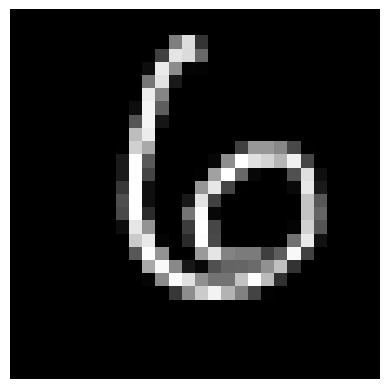

True label of image 100: 6
1/1 [==============================] - 0s 33ms/step
Predicted digit for image 100: 6


In [13]:
# Plot the image
my_image = x_test[100]
plt.imshow(my_image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()

# Print the true label of the image
print(f"True label of image 100: {np.argmax(y_test[100])}")

# Predict the digit using the loaded model
predicted_digit = np.argmax(saved_model.predict(np.expand_dims(my_image, axis=0)))
print(f"Predicted digit for image 100: {predicted_digit}")


---


**Conclusion**:


We explored using a CNN with Keras on the MNIST dataset to classify handwritten digits. We achieved high accuracy, addressed model loading warnings, and gained insights through visualizations and predictions. This hands-on experience provided a solid foundation in deep learning for image classification tasks.

---